In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is available


In [3]:
df = pd.read_csv("/content/drive/MyDrive/pos_and_neg_tweets_balanced_3.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category
0,0,0,northshoremed,other,Official twitter feed of North Shore Medical C...,2012-04-06 14:52:39,1931,2021-02-09 16:17:15,"""I just received the COVID-19 vaccine and I no...",3,0,False,Positive
1,1,1,GalwayCSD,other,Educate all students to their highest level of...,2018-08-13 16:22:02,216,2021-02-09 15:42:52,RT @SaratogaChamber: Thanks @WSWHEBOCES for ho...,0,1,True,Positive
2,2,2,gcavello,other,Prayer is the key! Never stop praying! God is...,2008-10-20 12:42:22,123,2021-02-09 15:17:56,Jjust got our 2nd dose of the Pfizer Covid-19 ...,2,0,False,Positive
3,3,3,SaratogaChamber,NaN,We believe in opening doors & closing deals. #...,2008-09-26 02:39:14,8831,2021-02-09 15:15:39,Thanks @WSWHEBOCES for hosting a vaccination c...,8,1,True,Positive
4,4,4,sondravet22,NaN,I AM A VIETNAM ERA SERVICE CONNECTED VET. I BE...,2019-01-18 07:11:11,160,2021-02-09 15:15:06,"RT @medcoe: #GetTheShot💉🦠 \n\nMr. Duane Hill, ...",0,3,True,Positive


In [4]:
df_text = df.loc[:, ['text','category']]
df_text

,text,category
0,"""I just received the COVID-19 vaccine and I no...",Positive
1,RT @SaratogaChamber: Thanks @WSWHEBOCES for ho...,Positive
2,Jjust got our 2nd dose of the Pfizer Covid-19 ...,Positive
3,Thanks @WSWHEBOCES for hosting a vaccination c...,Positive
4,"RT @medcoe: #GetTheShot💉🦠 \n\nMr. Duane Hill, ...",Positive
...,...,...
18486,RT @NickHudsonCT: Raising conflicts of interes...,Negative
18487,RT @NickHudsonCT: Raising conflicts of interes...,Negative
18488,RT @NickHudsonCT: Raising conflicts of interes...,Negative
18489,RT @NickHudsonCT: Raising conflicts of interes...,Negative


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_text = df_text[~df_text.duplicated()]
df_text

,text,category
0,"""I just received the COVID-19 vaccine and I no...",Positive
1,RT @SaratogaChamber: Thanks @WSWHEBOCES for ho...,Positive
2,Jjust got our 2nd dose of the Pfizer Covid-19 ...,Positive
3,Thanks @WSWHEBOCES for hosting a vaccination c...,Positive
4,"RT @medcoe: #GetTheShot💉🦠 \n\nMr. Duane Hill, ...",Positive
5,RT @ACPinternists: Help end the #pandemic. Get...,Positive
6,"Oh yeah, this happened yesterday! 2nd round in...",Positive
7,"Michael J. Menolasino, DO, FACOI has been work...",Positive
8,RT @USArmyEURAF: #IGotTheShot 👍 \n\nLast month...,Positive
9,#MyWhy (Soror Dr. Khiara Drew-Gilmore) I chose...,Positive


In [24]:
df_text['category'].value_counts()


Positive    3909
Negative    1479
Name: category, dtype: int64

In [6]:
import re

#Remove twitter Hashtags
df_text.text = df_text.text.apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
from sklearn.model_selection import train_test_split

X = df_text['text']
y = df_text['category']

y = pd.concat([y, pd.get_dummies(y, prefix='target')],axis=1)
y.drop(['category', 'target_Positive'],axis=1, inplace=True)
train_examples, test_examples, train_labels,  test_labels = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [8]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 4310, test entries: 1078


Let's print first 10 examples.

In [9]:
train_examples[:10]

1014     Global Forum on Vaccines and Immunology on 19 ...
939      RT Exciting day for our team at the Vaccinatio...
14226    You may be wondering what the difference is be...
2962     RT So many points missed all at once COVID19 V...
62       RT Know Reality of life after Death and Judgem...
14439    Nice explainer on how viruses mutate amp why t...
5159     RT I m not antivaxx for myself because I m not...
1229     Proud of my grandpa who received the first dos...
11458    I have really been touched by healthcare worke...
2355     as usual Australia is first to shove completel...
Name: text, dtype: object

Let's also print the first 10 labels.

In [10]:
train_labels[:10]

,target_Negative
1014,0
939,0
14226,0
2962,0
62,0
14439,0
5159,1
1229,0
11458,0
2355,0


In [11]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[-7.40878955e-02,  2.30378494e-01,  1.25317469e-01,
         6.76527172e-02,  5.49125252e-03, -1.22015409e-01,
        -5.63994288e-01,  2.14556269e-02,  1.24823302e-01,
        -1.49809569e-01, -8.53182003e-02, -1.29469857e-01,
         3.32107931e-01, -2.73113102e-01,  2.92356312e-01,
        -1.46390712e-02,  2.56796122e-01,  2.91302502e-02,
         1.28380969e-01,  3.00916910e-01,  8.47083628e-02,
        -7.56937042e-02, -3.72383976e-04,  1.95648804e-01,
        -8.43836367e-02,  2.71931030e-02,  2.42109880e-01,
         1.06422275e-01, -5.06160021e-01,  6.62380308e-02,
         1.12036899e-01,  9.92453098e-02, -9.29280445e-02,
         8.76822770e-02,  1.34815872e-01, -1.76117823e-01,
         1.92977011e-01,  1.11158997e-01, -2.44386643e-01,
         2.19721962e-02, -1.36365086e-01, -9.08277482e-02,
         2.95326591e-01,  1.98166609e-01, -4.83422205e-02,
         2.79501975e-01, -2.51732588e-01,  1.22200675e-01,
       

In [12]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [14]:
x_val = train_examples[:100]
partial_x_train = train_examples[100:]

y_val = train_labels[:100]
partial_y_train = train_labels[100:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
9/9 [==============================] - 1s 79ms/step - loss: 0.6967 - accuracy: 0.4936 - val_loss: 0.6571 - val_accuracy: 0.6700
Epoch 2/40
9/9 [==============================] - 0s 34ms/step - loss: 0.6429 - accuracy: 0.7037 - val_loss: 0.6116 - val_accuracy: 0.7300
Epoch 3/40
9/9 [==============================] - 0s 34ms/step - loss: 0.5975 - accuracy: 0.7307 - val_loss: 0.5687 - val_accuracy: 0.7600
Epoch 4/40
9/9 [==============================] - 0s 34ms/step - loss: 0.5525 - accuracy: 0.7341 - val_loss: 0.5284 - val_accuracy: 0.7600
Epoch 5/40
9/9 [==============================] - 0s 34ms/step - loss: 0.5027 - accuracy: 0.7473 - val_loss: 0.4901 - val_accuracy: 0.7600
Epoch 6/40
9/9 [==============================] - 0s 34ms/step - loss: 0.4627 - accuracy: 0.7501 - val_loss: 0.4539 - val_accuracy: 0.7700
Epoch 7/40
9/9 [==============================] - 0s 34ms/step - loss: 0.4123 - accuracy: 0.7837 - val_loss: 0.4182 - val_accuracy: 0.7900
Epoch 8/40
9/9 [===========

In [16]:
results = model.evaluate(test_examples, test_labels)

print(results)

34/34 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9276
[0.22298943996429443, 0.9276437759399414]


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

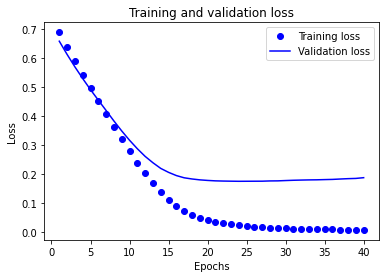

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

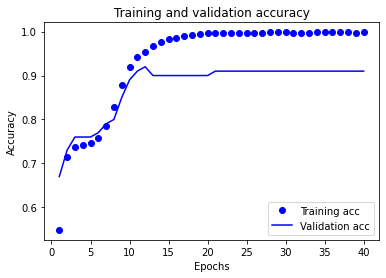

In [19]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()